# Cleaning San Diego Airbnb listings dataset
The goal of this notebook is to clean the raw Airbnb dataset. The original dataset can be found here: [Inside Airbnb](https://insideairbnb.com/get-the-data.html). I used the listings.csv [San Diego](http://insideairbnb.com/san-diego/) dataset compiled for November 2019.

In [2]:
# Import the necessary packages

# data managing and display libraries
import pandas as pd
import numpy as np
import seaborn as sb
import os
import io

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib inline

import math
import pylab
import scipy.stats as stats

In [3]:
df = pd.read_csv('listings.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (43,94) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20191121092222,2019-11-21,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,NaN
1,8488,https://www.airbnb.com/rooms/8488,20191121092222,2019-11-21,Juniper Zen Palace- SD's Best Hood!,Walk every where in San Diegos most charming a...,Private craftsman home in the heart of Histori...,Walk every where in San Diegos most charming a...,none,South Park is a charming community and our nei...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.36
2,29967,https://www.airbnb.com/rooms/29967,20191121092222,2019-11-21,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...","This two bedroom (1 CA king bed, 1 queen bed),...","This 2 bedroom, 2 full bathroom home offers al...",none,NaN,...,f,f,moderate,f,f,5,5,0,0,0.53
3,38245,https://www.airbnb.com/rooms/38245,20191121092222,2019-11-21,Point Loma/Liberty Station-NTC,Stay in a 1928 Spanish Style home. Den is dow...,Please note: 1928 home; remodeled in 2015. Co...,Stay in a 1928 Spanish Style home. Den is dow...,none,"This neighborhood is an expensive, high-end Po...",...,f,f,moderate,t,t,3,0,3,0,1.28
4,39516,https://www.airbnb.com/rooms/39516,20191121092222,2019-11-21,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,"Nestled in South/North Park, a gentrified neig...",We love having explorers from all over the wor...,none,"We love our eclectic neighborhood, with a smal...",...,f,f,strict_14_with_grace_period,t,f,1,1,0,0,3.38


The listings dataset contains about 106 different features for each of the Airbnb locations. We need to do some exploratory data analysis (EDA) to check if we can trim down some features.

In [5]:
print("Listings row, cols: ", df.shape)

Listings row, cols:  (13574, 106)


In [7]:
# check how the datatypes are distributed
df.dtypes.value_counts()

object     62
float64    23
int64      21
dtype: int64

There are about 13,574 Airbnb listings, and each of these listings has associated with it 106 features describing all aspects of the Airbnb listing. However, some of these features might have missing values, whereas some of them might not be relevant for our analysis (how does price vary across neighborhoods?). The data cleaning step will investigate and tackle these problems.

# Data Cleaning

Now we will focus on cleaning the data and storing the cleaned version back into our root folder. To clean the data, we'll employ the following strategy:

- Drop columns that are not relevant to the problem. Example: URL, host picture etc.
- Find missing values for each column.
- Drop columns which have more than 20% missing data. Make a note of the columns.
- Convert columns to their correct data type.
- Subset the dataset based on certain criterion. Ex: property_type = Apartment/House/Townhouse/Condo
- One-hot-encode the categorical variables.

In [9]:
# Set the display properties so that we can inspect the data
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

## Drop columns

Drop irrelevant Object types. Using ```select_dtypes``` we can filter out the desired type of columns.

In [10]:
df.select_dtypes(include=['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'license', '

In [11]:
drop_object_cols = ['listing_url', 
        'last_scraped', 
        'experiences_offered', 
        'notes',
        'house_rules', 
        'picture_url',
        'host_url', 
        'host_name', 
        'host_since', 
        'host_location', 
        'host_about',
        'host_response_time', 
        'host_response_rate', 
        'host_thumbnail_url', 
        'host_picture_url', 
        'host_neighbourhood',
        'host_verifications', 
        'host_has_profile_pic', 
        'host_identity_verified',
        'street', 
        'neighbourhood', 
        'city', 
        'state',
        'market', 
        'smart_location', 
        'country_code', 
        'country',
        'calendar_updated',
        'calendar_last_scraped', 
        'first_review',
        'last_review', 
    ]

In [13]:
df.select_dtypes(include=['object']).head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/5570,2019-11-21,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,NaN,Bus #8 goes to La Jolla and Old Town transit c...,"2 Bedrooms (1 Queen, 2 Twins) 1 Bath Balcony ...",Once reservation is made I will call guest. I...,"Min 4 nights winter. 7 nights Spring Break, l...",https://a0.muscache.com/im/pictures/d3342744-1...,https://www.airbnb.com/users/show/8435,Jef Karchin,2009-02-23,"San Diego, California, United States","Real estate broker, Jef Karchin real estate ...",within a few hours,100%,f,https://a0.muscache.com/im/users/8435/profile_...,https://a0.muscache.com/im/users/8435/profile_...,Mission Beach,"['email', 'phone', 'kba']",t,t,"San Diego, CA, United States",Mission Beach,Mission Bay,San Diego,CA,92109,San Diego,"San Diego, CA",US,United States,t,Condominium,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...","$2,050.00",NaN,NaN,$500.00,$150.00,$0.00,2 months ago,t,2019-11-21,NaN,NaN,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f
1,https://www.airbnb.com/rooms/8488,2019-11-21,Juniper Zen Palace- SD's Best Hood!,Walk every where in San Diegos most charming a...,Private craftsman home in the heart of Histori...,Walk every where in San Diegos most charming a...,none,South Park is a charming community and our nei...,we have no cable tv. just streaming services. ...,bus route to downtown is 1/2 block away!,backyard,NaN,"• Check-in time is 3PM. We are fun, easygoing ...",https://a0.muscache.com/im/pictures/b1f12e62-1...,https://www.airbnb.com/users/show/25186,Helene,2009-07-10,"Los Angeles, California, United States",HI! I am a photographer on tour. I have severa...,within an hour,100%,f,https://a0.muscache.com/im/pictures/user/b83cc...,https://a0.muscache.com/im/pictures/user/b83cc...,Burlingame,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"San Diego, CA, United States",South Park,South Park,San Diego,CA,92104,San Diego,"San Diego, CA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$225.00,NaN,NaN,$300.00,$175.00,$50.00,5 weeks ago,t,2019-11-21,2010-10-13,2016-03-24,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,t,t
2,https://www.airbnb.com/rooms/29967,2019-11-21,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...","This two bedroom (1 CA king bed, 1 queen bed),...","This 2 bedroom, 2 full bathroom home offers al...",none,NaN,NaN,NaN,NaN,NaN,This is not a party house. This is a quiet fam...,https://a0.muscache.com/im/pictures/76103867/c...,https://www.airbnb.com/users/show/129123,Michael,2010-05-21,"San Diego, California, United States",We love living part of the year in San Diego. ...,within an hour,100%,f,https://a0.muscache.com/im/users/129123/profil...,https://a0.muscache.com/im/users/129123/profil...,Pacific Beach,"['email', 'pho

Drop irrelevant float64 types. Using ```select_dtypes``` we can filter out the desired type of columns.

In [14]:
df.select_dtypes(include=['float64']).columns

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [15]:
drop_float_cols = ['thumbnail_url', 
                   'medium_url', 
                   'xl_picture_url', 
                   'minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm'
                  ]

In [17]:
df.select_dtypes(include=['int64']).columns

Index(['id', 'scrape_id', 'host_id', 'accommodates', 'guests_included',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [18]:
df.select_dtypes(include=['int64']).head(5)

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5570,20191121092222,8435,6,1,3,365,3,3,365,365,12,20,31,176,0,0,2,2,0,0
1,8488,20191121092222,25186,5,4,3,1125,3,3,1125,1125,6,20,42,218,40,0,2,2,0,0
2,29967,20191121092222,129123,8,6,4,365,4,4,365,365,0,0,0,234,60,0,5,5,0,0
3,38245,20191121092222,164137,1,1,1,21,1,1,21,21,0,1,31,306,143,6,3,0,3,0
4,39516,20191121092222,169649,2,1,3,7,3,3,7,7,16,37,61,319,384,45,1,1,0,0


In [19]:
drop_int_cols = ['scrape_id', 
                 'host_id', 
                 'minimum_nights', 
                 'maximum_nights', 
                 'minimum_minimum_nights',
                 'maximum_minimum_nights', 
                 'minimum_maximum_nights',
                 'maximum_maximum_nights'
                ]

In [21]:
# combine all the columns and drop them
drop_cols = drop_object_cols + drop_float_cols + drop_int_cols
print("Shape of the dataset before dropping: ", df.shape)
print("Dropping {} columns".format(len(drop_cols)))
df_clean_df = df.drop(columns=drop_cols)
print("Shape of the dataset after dropping: ", df_clean_df.shape)

Shape of the dataset before dropping:  (13574, 106)
Dropping 44 columns
Shape of the dataset after dropping:  (13574, 62)


## Missing Value Statistics

An important step in data cleaning is identifying columns with missing values. Let's first do this by calculating the missing value statistics.

In [23]:
def missing_statistics(df):
    '''
        Calculates missing value statistics 
        for a given dataframe and returns a dataframe
        containing number of missing values per column 
        and the percentage of values missing per column.
        
        args:
            df: the dataframe for which missing values need to be calculated
    '''
    
    missing_stats = df.isnull().sum().to_frame()
    missing_stats.columns = ['num_missing']
    missing_stats['pct_missing'] = np.round(100 * (missing_stats['num_missing'] / df.shape[0]))
    missing_stats.sort_values(by='num_missing', ascending=False, inplace=True)
    
    return missing_stats
    

In [24]:
num_missing = missing_statistics(df_clean_df)
num_missing

,num_missing,pct_missing
host_acceptance_rate,13574,100.0
neighbourhood_group_cleansed,13574,100.0
license,13527,100.0
square_feet,13398,99.0
monthly_price,12701,94.0
weekly_price,12557,93.0
access,5143,38.0
transit,4977,37.0
interaction,4523,33.0
neighborhood_overview,3971,29.0


As we can see in the table above, few columns have 100% missing data. We will drop these columns. Upon close observation, it also makes sense to drop the columns which have more than 11% missing data.

In [26]:
cols_to_drop = list(num_missing[num_missing.pct_missing > 10].index)
cols_to_drop

['host_acceptance_rate',
 'neighbourhood_group_cleansed',
 'license',
 'square_feet',
 'monthly_price',
 'weekly_price',
 'access',
 'transit',
 'interaction',
 'neighborhood_overview',
 'space',
 'security_deposit',
 'review_scores_value',
 'review_scores_location',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_rating',
 'reviews_per_month',
 'cleaning_fee']

In [27]:
df_clean_df = df_clean_df.drop(cols_to_drop, axis='columns')
print(df_clean_df.shape)

(13574, 41)


At this point, we haven't fully dealt with the mising values. But before we move forward with handling missing values, let's first validate that each of variable is of the correct type (ie, boolean and categorical type).

Representing all string columns as **object type** is _not_ an effective approach. We need to convert the object types to categorical or boolean if necessary. Another advantage of converting them from object to categorical/boolean is that we can make use of ```pd.get_dummies()``` to easily one-hot-encode the variables.

## Convert object types to categorical and boolean variables

As you can see, some of the **object** variables should actually be categorical variables (ie, ```property_type```), boolean variables (ie, ```host_is_superhost```) or text variables (ie, ```summary``` or ```description```).

In [29]:
df_clean_df.select_dtypes(['object']).head()

,name,summary,description,host_is_superhost,neighbourhood_cleansed,zipcode,is_location_exact,property_type,room_type,bed_type,amenities,price,extra_people,has_availability,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,Missionbeachretreat. Great Ocean Front Condo...,f,Mission Bay,92109,t,Condominium,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...","$2,050.00",$0.00,t,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f
1,Juniper Zen Palace- SD's Best Hood!,Walk every where in San Diegos most charming a...,Walk every where in San Diegos most charming a...,f,South Park,92104,t,House,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$225.00,$50.00,t,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,t,t
2,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...","This 2 bedroom, 2 full bathroom home offers al...",f,Pacific Beach,92109,t,Bungalow,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",$225.00,$15.00,t,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,moderate,f,f
3,Point Loma/Liberty Station-NTC,Stay in a 1928 Spanish Style home. Den is dow...,Stay in a 1928 Spanish Style home. Den is dow...,f,Roseville,92106,t,House,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$75.00,$10.00,t,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,moderate,t,t
4,Art Studio Retreat/Rustic Cabin,We love having explorers from all over the wor...,We love having explorers from all over the wor...,t,North Hills,92104,t,Tiny house,Entire home/apt,Real Bed,"{Internet,Wifi,Pool,Kitchen,""Pets live on this...",$74.00,$0.00,t,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,t,f


First, let's identify **categorical** variables and separate them from text variables. Later, further down in the notebook, we will one-hot-encode all the categorical variables.

In [31]:
df_clean_df.select_dtypes(include='object').columns

Index(['name', 'summary', 'description', 'host_is_superhost',
       'neighbourhood_cleansed', 'zipcode', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'extra_people', 'has_availability', 'requires_license',
       'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [32]:
# collect all variables which need to be be dummy encoded
categorical_types = ['host_is_superhost',
                     'is_location_exact',
                     'property_type', 
                     'room_type', 
                     'bed_type', 
                     'has_availability', 
                     'requires_license',
                     'instant_bookable', 
                     'is_business_travel_ready',
                     'cancellation_policy', 
                     'require_guest_profile_picture',
                     'require_guest_phone_verification']

In [33]:
df_clean_df[categorical_types].dtypes

host_is_superhost                   object
is_location_exact                   object
property_type                       object
room_type                           object
bed_type                            object
has_availability                    object
requires_license                    object
instant_bookable                    object
is_business_travel_ready            object
cancellation_policy                 object
require_guest_profile_picture       object
require_guest_phone_verification    object
dtype: object

In [35]:
df_clean_df[categorical_types] = df_clean_df[categorical_types].apply(lambda x: x.astype('category'), axis='rows')

df_clean_df[categorical_types].dtypes

host_is_superhost                   category
is_location_exact                   category
property_type                       category
room_type                           category
bed_type                            category
has_availability                    category
requires_license                    category
instant_bookable                    category
is_business_travel_ready            category
cancellation_policy                 category
require_guest_profile_picture       category
require_guest_phone_verification    category
dtype: object

## Subset the dataset

Now let's check how many unique values each of these columns has. This can be achieve using the ```pd.Series.nunique``` method.

In [37]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_values = df_clean_df[categorical_types].apply(pd.Series.nunique, axis='rows')
print(num_unique_values)

host_is_superhost                    2
is_location_exact                    2
property_type                       38
room_type                            4
bed_type                             5
has_availability                     1
requires_license                     1
instant_bookable                     2
is_business_travel_ready             1
cancellation_policy                  7
require_guest_profile_picture        2
require_guest_phone_verification     2
dtype: int64


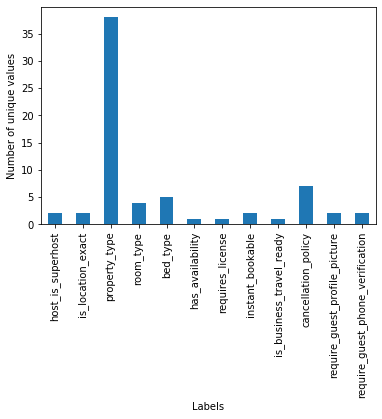

In [38]:
# Plot number of unique values for each label
num_unique_values.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

Looking at the plot, there are _a lot_ of property types in the data. Why is that? Looking at the numbers below, we see that San Diego has many peculiar properties (ie, Serviced apartment, Aparthotel, Dome house).

In [39]:
df_clean_df.property_type.value_counts()

House                     4668
Apartment                 3648
Condominium               2076
Townhouse                  717
Guest suite                508
Guesthouse                 501
Bungalow                   302
Cottage                    300
Loft                       279
Villa                       81
Serviced apartment          68
Camper/RV                   68
Hostel                      64
Boutique hotel              55
Bed and breakfast           47
Boat                        35
Other                       34
Tiny house                  30
Resort                      18
Hotel                       18
Aparthotel                  17
Cabin                        7
Tent                         6
Earth house                  5
Cave                         3
Treehouse                    3
Castle                       2
Casa particular (Cuba)       2
Bus                          2
Dome house                   2
Campsite                     1
Farm stay                    1
Vacation

Since we're going to subset the dataset, let's save a copy of the original/partially cleaned dataset with all the property types.

In [40]:
df_clean_df.to_csv("listings_without_subset_partially_clean.csv", index=False)

In [42]:
# Subset the data to include fewer property types
df_airbnb = df_clean_df[df_clean_df.property_type.isin(['Apartment', 'House', 'Townhouse', 'Condominium'])]

In [43]:
# Let pandas know that to use a copy instead of a view
df_airbnb = df_airbnb.copy()

# We need to remove unused categories since we are using type category
# The removed categories are retained with count of 0
# So, we need to explicitly remove the unused categories
df_airbnb.loc[:, 'property_type'] = df_airbnb.loc[:,'property_type'].cat.remove_unused_categories()

In [44]:
df_airbnb.property_type.value_counts()

House          4668
Apartment      3648
Condominium    2076
Townhouse       717
Name: property_type, dtype: int64

In [45]:
df_airbnb.head()

,id,name,summary,description,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5570,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,Missionbeachretreat. Great Ocean Front Condo...,f,3.0,3.0,Mission Bay,92109,32.78430,-117.25258,t,Condominium,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...","$2,050.00",1,$0.00,t,12,20,31,176,0,0,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,2,0,0
1,8488,Juniper Zen Palace- SD's Best Hood!,Walk every where in San Diegos most charming a...,Walk every where in San Diegos most charming a...,f,4.0,4.0,South Park,92104,32.72839,-117.12824,t,House,Entire home/apt,5,2.0,3.0,3.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$225.00,4,$50.00,t,6,20,42,218,40,0,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,t,t,2,2,0,0
3,38245,Point Loma/Liberty Station-NTC,Stay in a 1928 Spanish Style home. Den is dow...,Stay in a 1928 Spanish Style home. Den is dow...,f,3.0,3.0,Roseville,92106,32.74202,-117.21870,t,House,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$75.00,1,$10.00,t,0,1,31,306,143,6,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,moderate,t,t,3,0,3,0
5,52286,Surf Rider Ocean Front Condo in Mission Beach,The Surf Rider Condo is located directly on th...,The Surf Rider Condo is located directly on th...,f,1.0,1.0,Mission Bay,92109,32.77784,-117.25355,t,Condominium,Entire home/apt,6,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",$550.00,1,$0.00,t,30,60,90,90,0,0,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1,0,0
6,54001,"La Jolla Peaceful: Sitting Room, Breakfast",NaN,The Peaceful is one of two bedrooms in the de...,t,5.0,5.0,La Jolla,92037,32.81190,-117.26952,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Breakfast,""Free st...",$110.00,1,$0.00,t,7,19,47,322,214,40,f,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,flexible,f,t,3,0,3,0


## Missing Value Statistics for the subset

In [46]:
missing_df = missing_statistics(df_airbnb)
missing_df

,num_missing,pct_missing
jurisdiction_names,428,4.0
summary,400,4.0
description,235,2.0
zipcode,112,1.0
bedrooms,14,0.0
beds,14,0.0
host_is_superhost,6,0.0
host_listings_count,6,0.0
host_total_listings_count,6,0.0
bathrooms,4,0.0


The missing values for columns starting with host seem to have a pattern. Since all these columns have 6 missing values, it could be possible that the data is missing purpose.

In [47]:
# Collect all the columns which have missing values
cols_missing_values = list(missing_df[missing_df.num_missing > 0].index)

df_airbnb_missing_values = df_airbnb[cols_missing_values]
df_airbnb_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11109 entries, 0 to 13573
Data columns (total 10 columns):
jurisdiction_names           10681 non-null object
summary                      10709 non-null object
description                  10874 non-null object
zipcode                      10997 non-null object
bedrooms                     11095 non-null float64
beds                         11095 non-null float64
host_is_superhost            11103 non-null category
host_listings_count          11103 non-null float64
host_total_listings_count    11103 non-null float64
bathrooms                    11105 non-null float64
dtypes: category(1), float64(5), object(4)
memory usage: 878.8+ KB


Check if the 6 missing values of the host columns are missing together. Here's how:

In [50]:
host_cols = list(df_airbnb_missing_values.columns[df_airbnb_missing_values.columns.str.contains('host')])
df_airbnb_missing_values[host_cols][df_airbnb_missing_values.host_is_superhost.isnull()]

,host_is_superhost,host_listings_count,host_total_listings_count
272,NaN,NaN,NaN
716,NaN,NaN,NaN
3483,NaN,NaN,NaN
3484,NaN,NaN,NaN
3485,NaN,NaN,NaN
11742,NaN,NaN,NaN


And voila! The host columns have missing values for the same observation.

## Handling Missing Values
- For cols containing text, we will replace them with an empty string.
- For categoricals cols, we will replace missing values with the mode.
- For continuous cols, we will replace the missing values with median. 

Then we will use sklearn's ```SimpleImputer``` to replace the missing values. 

**TEXT COLUMNS:**

In [51]:
df_airbnb_clean = df_airbnb.copy(deep=True)
df_airbnb_clean.shape

(11109, 41)

In [52]:
# to avoid setcopywithwarning use .copy() – this will tell pandas use a copy and not a view
df_airbnb_clean.loc[df_airbnb_clean.summary.isna().copy(), 'summary'] = ''
df_airbnb_clean.loc[df_airbnb_clean.description.isna().copy(), 'description'] = ''
df_airbnb_clean.loc[df_airbnb_clean.jurisdiction_names.isna().copy(), 'jurisdiction_names'] = ''
df_airbnb_clean.loc[df_airbnb_clean.zipcode.isna().copy(), 'zipcode'] = ''

**CATEGORICAL COLUMNS:**

In [57]:
pip install --user scikit-learn

     |████████████████████████████████| 7.0 MB 1.2 MB/s eta 0:00:01
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.impute import SimpleImputer

category_missing_cols = ['host_is_superhost']

float_missing_cols = ['bathrooms', 
                      'beds', 
                      'bedrooms',
                      'host_total_listings_count',
                      'host_listings_count']

For validation purposes, let's first check the ```float_missing_cols```. For example, check the bathrooms and bedrooms columns, you will notice there are some NaN values there. If the missing value imputation is successful, then we should expect to see these NaN values replaced by their median values.

In [59]:
# Get all the observations for float_missing_cols which contain na
# Use np.where to get the indices of these observations
# index = np.where(df_airbnb_clean[float_missing_cols].isna() == True)
# df_airbnb_clean.iloc[index, :]
# Store these indices so that we can validate after imputation
# indexes = list(index)
# df_airbnb_clean.iloc[index, :]

In [60]:
def replace_missing_values(cols, df):
    '''
        Takes a list of columns and a dataframe and imputes based on
        the column type. If it is object type, then most_frequent value
        is used for imputation. If it is a float/int type, then the median
        value is used for imputation.
        arguments:
            cols: list of columns
            df : dataframe containing these columns.
        returns:
            df: the imputed dataframe
    '''
    
    for col in cols:
        if type(df[col].dtype) is pd.core.dtypes.dtypes.CategoricalDtype:
            print("Imputing {} column with most frequent value".format(col))
            mode_imputer = SimpleImputer(strategy='most_frequent')
            df.loc[:, col] = mode_imputer.fit_transform(df[[col]])
        elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
            print('Imputing {} column with median value'.format(col))
            median_imputer = SimpleImputer(strategy='median')
            df.loc[:, col] = median_imputer.fit_transform(df[[col]])
        else:
            raise ValueError('Invalid column type')
            
    return df

In [61]:
df_airbnb_clean = replace_missing_values(float_missing_cols, df_airbnb_clean)
df_airbnb_clean = replace_missing_values(category_missing_cols, df_airbnb_clean)

Imputing bathrooms column with median value
Imputing beds column with median value
Imputing bedrooms column with median value
Imputing host_total_listings_count column with median value
Imputing host_listings_count column with median value
Imputing host_is_superhost column with most frequent value


After imputation, we have successfully removed all the missing values.

In [62]:
df_airbnb_clean.isna().sum()

id                                              0
name                                            0
summary                                         0
description                                     0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_cleansed                          0
zipcode                                         0
latitude                                        0
longitude                                       0
is_location_exact                               0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
bed_type                                        0
amenities                                       0


# Clean the columns

Some columns like ```price``` are represented as objects since they have a dollar sign. Before we proceed further with our analysis, we need to clean these columns.

## Cleaning price and extra_people

In [63]:
import re
df_airbnb_clean['price'] = df_airbnb_clean.price.apply(lambda x:re.sub(r'[$,]', '', x)).astype('float')
df_airbnb_clean['extra_people'] = df_airbnb_clean.extra_people.apply(lambda x:re.sub(r'[$,]', '', x)).astype('float')

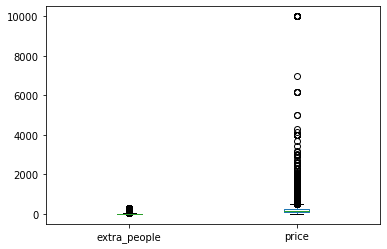

In [64]:
df_airbnb_clean[['extra_people', 'price']].plot(kind='box')

We see that price has quite a few outliers. We will deal with outliers next.

## One-hot encode the categorical variables

In [65]:
category_one_hot_encoding = pd.get_dummies(df_airbnb_clean[categorical_types])
category_one_hot_encoding.head(5)

,host_is_superhost_f,host_is_superhost_t,is_location_exact_f,is_location_exact_t,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Townhouse,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,has_availability_t,requires_license_f,instant_bookable_f,instant_bookable_t,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_luxury_moderate,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1
5,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
6,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1


In [66]:
category_one_hot_encoding.shape

(11109, 33)

In [67]:
df_airbnb_clean.shape

(11109, 41)

We need to merge these two and drop the categorical variables.

In [68]:
df_airbnb_clean = pd.concat([df_airbnb_clean, category_one_hot_encoding],
                           axis='columns').drop(categorical_types,
                                               axis='columns')

df_airbnb_clean.shape

(11109, 62)

Write the final clean data to a new csv file

In [70]:
df_airbnb_clean.to_csv('airbnb_clean.csv', index=False)